# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.


### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers. This is especially important for the textual description and probability output (below).

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [52]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from numpy import savetxt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from utils.plotter import plot_voronoi
from sklearn.model_selection import GridSearchCV

# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

## Exploring the datatsets

In [5]:
# This is where your working code should start. Fell free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:
# Loading the dataset 

data_path_train = os.path.join(os.getcwd(), "datasets", "Images_C_Train.csv")
C_Train= pd.read_csv(data_path_train, delimiter = ",")
data_path_valid = os.path.join(os.getcwd(), "datasets", "Images_C_Validate.csv")
C_Val = pd.read_csv(data_path_valid, delimiter = ",")
data_path_test = os.path.join(os.getcwd(), "datasets", "Images_C_Test.csv")
C_Test = pd.read_csv(data_path_test, delimiter = ",")
print(C_Train.info())
print(C_Val.info())
print(C_Test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Columns: 520 entries, imgId to is_tvmonitor
dtypes: float64(500), int64(19), object(1)
memory usage: 8.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 520 entries, imgId to is_tvmonitor
dtypes: float64(494), int64(25), object(1)
memory usage: 4.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Columns: 501 entries, dim1 to is_person
dtypes: float64(500), object(1)
memory usage: 4.3+ MB
None


In [6]:
C_Train.head(3)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0


In [7]:
C_Val.head(3)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_002199,0.001698,0.0,0.003057,0.002378,0.001019,0.001698,0.000340,0.001019,0.001359,...,0,0,0,0,0,1,0,0,0,0
1,2008_002179,0.002038,0.0,0.004076,0.001019,0.001019,0.001019,0.000679,0.001019,0.001019,...,0,0,0,0,1,1,0,0,0,0
2,2008_002495,0.001116,0.0,0.005208,0.001860,0.001116,0.000000,0.001488,0.002232,0.001116,...,0,0,0,0,0,1,0,0,0,0


In [8]:
C_Test.head(3)

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.000000,0.000000,0.000000,0.001019,0.001698,0.000679,0.000679,0.000000,0.005435,0.009171,...,0.00000,0.004755,0.000340,0.000000,0.000340,0.003397,0.000679,0.000679,0.008832,?
1,0.000372,0.000000,0.014137,0.000372,0.002232,0.001116,0.000744,0.008185,0.000372,0.001116,...,0.00000,0.007068,0.000372,0.004464,0.003348,0.000744,0.004836,0.000000,0.010045,?
2,0.001019,0.000679,0.006793,0.001359,0.000340,0.001359,0.002717,0.002038,0.001359,0.000679,...,0.00034,0.020720,0.002717,0.003397,0.001019,0.001019,0.002378,0.002378,0.003057,?


In [9]:
C_Train.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,0.043353,0.050830,0.047988,0.037411,0.043365,0.049670,0.051071,0.043601,0.052698,0.054139,...,0.017511,0.025083,0.088027,0.045433,0.048273,0.448178,0.040227,0.015144,0.032655,0.050639
std,0.513260,0.582839,0.482166,0.464611,0.491187,0.558422,0.577599,0.472706,0.571629,0.588484,...,0.131195,0.156414,0.283401,0.208301,0.214392,0.497425,0.196538,0.122156,0.177774,0.219311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000868,0.000000,0.001359,0.000781,0.001116,0.001019,0.000340,0.000651,0.000756,0.001116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001616,0.000340,0.003516,0.001698,0.002038,0.001860,0.000756,0.001645,0.001698,0.002155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002404,0.001008,0.006454,0.002717,0.003125,0.003057,0.001488,0.003397,0.002734,0.003736,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dims=C_Train[C_Train.columns[pd.Series(C_Train.columns).str.startswith('dim')]]
X_tr =pd.concat([dims], axis=1)
dims=C_Val[C_Val.columns[pd.Series(C_Val.columns).str.startswith('dim')]]
X_val = pd.concat([dims], axis=1)
dims=C_Test[C_Test.columns[pd.Series(C_Test.columns).str.startswith('dim')]]
X_tst =pd.concat([dims], axis=1)
y_tr = C_Train["is_person"].values
y_val = C_Val["is_person"].values
y_tst = C_Test["is_person"].values

## Scatter plots

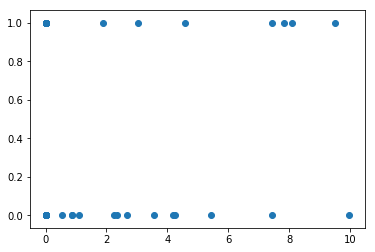

In [11]:
plt.scatter(x=X_tr["dim1"],y=y_tr)

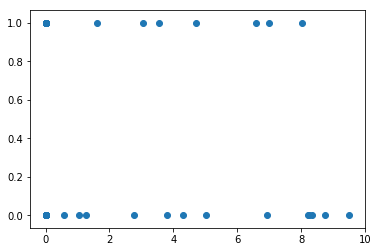

In [12]:
plt.scatter(x=X_tr["dim500"],y=y_tr)

## Preprocessing

In [15]:
#StandardScaler
stc = StandardScaler()
stc.fit(X_tr)
X_tr_std = stc.transform(X_tr)
X_val_std = stc.transform(X_val)

#Normalisation
X_tr_norm = normalize(X_tr, norm='l2')
X_val_norm = normalize(X_val, norm='l2')


## Supervised Techniques
### Dummy Classifier 


In [55]:

#with Standard Scaler
dummy = DummyClassifier()#strategy='prior')
dummy.fit(X_tr_std,y_tr)
dummy_pred = dummy.predict(X_val_std)
print("Accuracy Score for X_val_std using the Dummy Classifier: {:.5f}".format(accuracy_score(y_val,dummy_pred)))
print("Logarithmic Loss for X_val_std using the Dummy Classifier: {:.5f}".format(log_loss(y_val,dummy_pred)))


#with Normalisation
dummy = DummyClassifier()#strategy='prior')
dummy.fit(X_tr_norm,y_tr)
dummy_pred = dummy.predict(X_val_norm)
print("Accuracy Score for X_val_norm using the Dummy Classifier: {:.5f}".format(accuracy_score(y_val,dummy_pred)))
print("Logarithmic Loss for X_val_norm using the Dummy Classifier: {:.5f}".format(log_loss(y_val,dummy_pred)))

Accuracy Score for X_val_std using the Dummy Classifier: 0.49057
17.595418964620915
Logarithmic Loss for X_val_std using the Dummy Classifier: 17.59542
Accuracy Score for X_val_norm using the Dummy Classifier: 0.50225
Logarithmic Loss for X_val_norm using the Dummy Classifier: 17.19199


### Trying Logistic Regression, the RandomForestClassifier,  and SVC.

In [28]:
# Logistic Regression with StandardScale
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_tr_std,y_tr)
LR_pred = LR.predict(X_val_std)
print("Accuracy Score for X_val_std using Logistic Regression: {:.5f}".format(accuracy_score(y_val,LR_pred)))
print("Logarithmic Loss for X_val_std using Logistic Regression: {:.5f}".format(log_loss(y_val,LR_pred)))

# Logistic Regression with Normalization
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_tr_norm,y_tr)
LR_pred = LR.predict(X_val_norm)
print("\nAccuracy Score for X_val_norm using Logistic Regression: {:.5f}".format(accuracy_score(y_val,LR_pred)))
print("Logarithmic Loss for X_val_norm using Logistic Regression: {:.5f}".format(log_loss(y_val,LR_pred)))

# Random Forrest Classifier with StandardScale
RFM = RandomForestClassifier(random_state=0,n_estimators=250)
RFM .fit(X_tr_std,y_tr)
RFM_pred = RFM.predict(X_val_std)
print("\nAccuracy Score for X_val_std using a Random Forest Classifier: {:.5f}".format(accuracy_score(y_val,RFM_pred)))
print("Logarithmic Loss for X_val_std using a Random Forest Classifierr: {:.5f}".format(log_loss(y_val,RFM_pred)))
# Random Forrest Classifier with Normalization
RFM = RandomForestClassifier(random_state=0,n_estimators=250)
RFM .fit(X_tr_norm,y_tr)
RFM_pred = RFM.predict(X_val_norm)
print("\nAccuracy Score for X_val_norm using a Random Forest Classifier: {:.5f}".format(accuracy_score(y_val,RFM_pred)))
print("Logarithmic Loss for X_val_norm using a Random Forest Classifierr: {:.5f}".format(log_loss(y_val,RFM_pred)))

from sklearn.svm import SVC
# SVC with StandardScale
SVC = SVC(kernel='rbf', probability=True)
SVC.fit(X_tr_std,y_tr)
SVC_pred = SVC.predict(X_val_std)
print("\nAccuracy Score for X_val using SVC: {:.5f}".format(accuracy_score(y_val,SVC_pred)))
print("Logarithmic Loss for X_val_std using SVC: {:.5f}".format(log_loss(y_val,SVC_pred)))

from sklearn.svm import SVC
# SVC with Normalization
SVC = SVC(kernel='rbf', probability=True)
SVC.fit(X_tr_norm,y_tr)
SVC_pred = SVC.predict(X_val_norm)
print("\nAccuracy Score for X_val_norm using SVC: {:.5f}".format(accuracy_score(y_val,SVC_pred)))
print("Logarithmic Loss for X_val_norm using SVC: {:.5f}".format(log_loss(y_val,SVC_pred)))

Accuracy Score for X_val_std using Logistic Regression: 0.60737
Logarithmic Loss for X_val_std using Logistic Regression: 13.56107

Accuracy Score for X_val_norm using Logistic Regression: 0.69452
Logarithmic Loss for X_val_norm using Logistic Regression: 10.55102

Accuracy Score for X_val_std using a Random Forest Classifier: 0.69003
Logarithmic Loss for X_val_std using a Random Forest Classifierr: 10.70619

Accuracy Score for X_val_norm using a Random Forest Classifier: 0.69452
Logarithmic Loss for X_val_norm using a Random Forest Classifierr: 10.55103

Accuracy Score for X_val using SVC: 0.52650
Logarithmic Loss for X_val_std using SVC: 16.35394

Accuracy Score for X_val_norm using SVC: 0.52650
Logarithmic Loss for X_val_norm using SVC: 16.35394


## Unsupervised Techniques
### KMeans with PCA 

In [13]:
print("Number of photos classified as a person: {}".format(len(y_tr[y_tr==1])))
print("Number of photos classified as not a person: {}".format(len(y_tr[y_tr==0])))

Number of photos classified as a person: 947
Number of photos classified as not a person: 1166


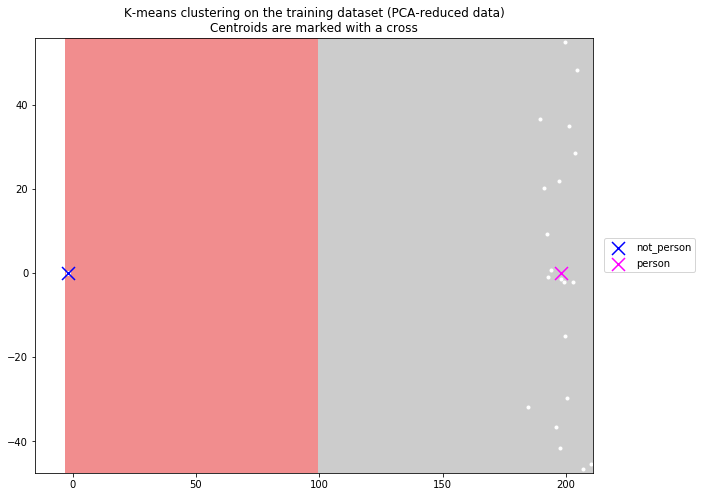

In [30]:
reduced_data = PCA(n_components=2).fit_transform(X_tr_std)
kmeans_pca1 = KMeans(n_clusters=2, random_state=1000) 
kmeans_pca1.fit(reduced_data)

centrocolor=['blue', 'magenta']
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
plt.figure(figsize=(10,8))
plot_voronoi(kmeans_pca1,[x_min,x_max,y_min,y_max])
# Plot the centroids as X
centroids = kmeans_pca1.cluster_centers_

plt.plot(reduced_data [:,0],reduced_data [:,1],".w",markersize=6)
plt.title('K-means clustering on the training dataset (PCA-reduced data)\n'
          'Centroids are marked with a cross')


labels= ["not_person","person"]
for it in range(centroids.shape[0]):
    plt.scatter(centroids[it,0], centroids[it,1],
            marker='x', s=169, linewidths=3,
            color=centrocolor[it], zorder=10,
            label=labels[it])
    
plt.legend(loc='center left', scatterpoints=1, bbox_to_anchor=[1.01, 0.5])


## Parameter estimation using grid search with cross-validation
### Optimising Logistic Regressor

In [31]:
clf2 = LogisticRegression(solver='lbfgs',class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          random_state=0, tol=0.0001,
          verbose=0, warm_start=False)

param_grid2 = {'C': np.logspace(-6,8,20) }
              

grid_search2 = GridSearchCV(clf2, param_grid=param_grid2,scoring='neg_log_loss') # Use default 3 fold cross validation
grid_search2.fit(X_tr_norm, y_tr)
pass

In [32]:
top1 = pd.DataFrame.from_dict(grid_search2.cv_results_) 
top1[top1['rank_test_score']<6]   # show top 5

C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,0.046755,0.003922,0.001334,0.001886,0.0263665,{'C': 0.026366508987303555},-0.661407,-0.660235,-0.665262,-0.662298,0.002147,5,-0.658818,-0.659731,-0.653501,-0.657350,0.002747
7,0.054256,0.004301,0.000332,0.000470,0.143845,{'C': 0.14384498882876628},-0.625357,-0.619570,-0.640374,-0.628422,0.008764,3,-0.615754,-0.619597,-0.603283,-0.612878,0.006964
8,0.065657,0.004417,0.000333,0.000470,0.78476,{'C': 0.7847599703514607},-0.594097,-0.578327,-0.620810,-0.597723,0.017528,2,-0.558518,-0.566985,-0.543232,-0.556245,0.009829
9,0.101049,0.003155,0.002043,0.001688,4.28133,{'C': 4.281332398719387},-0.591851,-0.553571,-0.622967,-0.589432,0.028376,1,-0.483081,-0.500051,-0.466019,-0.483050,0.013894
10,0.150957,0.002002,0.001334,0.001886,23.3572,{'C': 23.357214690901213},-0.653152,-0.567159,-0.694639,-0.638263,0.053087,4,-0.395211,-0.420476,-0.375980,-0.397222,0.018221


From the above table, we can identify that including an optimal value for the paramter C would increase the accuracy.

In [34]:
optimalC = top1[top1['rank_test_score'] == 1]['param_C'].real[0]
LR_new = LogisticRegression(solver='lbfgs',C=optimalC)
LR_new.fit(X_tr_norm,y_tr)
LR_new_pred = LR_new.predict(X_val_norm)
print("Accuracy Score for X_val_norm using Logistic Regression: {:.5f}".format(accuracy_score(y_val,LR_new_pred)))
print("Logarithmic Loss for X_val_norm using Logistic Regression: {:.5f}".format(log_loss(y_val,LR_new_pred)))

Accuracy Score for X_val_norm using Logistic Regression: 0.69452
Logarithmic Loss for X_val_norm using Logistic Regression: 10.55103


In [35]:
clf = RandomForestClassifier(n_estimators=250,random_state=0)

param_grid = {"max_depth": [None, 5],
              "max_features": ['auto','log2'],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid,scoring='neg_log_loss') #   Use default 3 fold cross validation
grid_search.fit(X_tr_norm, y_tr)
pass


In [36]:
top2 = pd.DataFrame.from_dict(grid_search.cv_results_) 
top2[top2['rank_test_score']<6]   # show top 5

C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,12.174653,0.331296,0.076444,0.002622,True,entropy,None,auto,"{'bootstrap': True, 'criterion': 'entropy', 'm...",-0.590410,-0.578256,-0.613318,-0.593976,0.014531,3,-1.735823e-01,-1.724758e-01,-1.677226e-01,-1.712602e-01,0.002542
8,12.011996,0.106275,0.079750,0.000707,False,gini,None,auto,"{'bootstrap': False, 'criterion': 'gini', 'max...",-0.583637,-0.577688,-0.617658,-0.592971,0.017600,2,-9.992007e-16,-9.992007e-16,-9.992007e-16,-9.992007e-16,0.000000
9,5.021607,0.069082,0.082861,0.003454,False,gini,None,log2,"{'bootstrap': False, 'criterion': 'gini', 'max...",-0.587709,-0.587018,-0.616272,-0.596981,0.013624,5,-9.992007e-16,-9.992007e-16,-9.992007e-16,-9.992007e-16,0.000000
12,20.103931,0.389015,0.085118,0.017944,False,entropy,None,auto,"{'bootstrap': False, 'criterion': 'entropy', '...",-0.580311,-0.576433,-0.614897,-0.590524,0.017282,1,-9.992007e-16,-9.992007e-16,-9.992007e-16,-9.992007e-16,0.000000
13,8.438881,0.087486,0.087722,0.006760,False,entropy,None,log2,"{'bootstrap': False, 'criterion': 'entropy', '...",-0.586674,-0.582997,-0.617262,-0.595624,0.015352,4,-9.992007e-16,-9.992007e-16,-9.992007e-16,-9.992007e-16,0.000000


From the above table, we can identify which parameters it would be best to include in our RandomForestClassifier model for higher accuracy.
The paramters are:
* bootstrap=False
* criterion='entropy'
* max_depth=None
* max_features='auto'

In [39]:
RFM_new = RandomForestClassifier(random_state=0,n_estimators=500,bootstrap=False,criterion='entropy',max_depth=None,max_features='auto')
RFM_new.fit(X_tr_norm,y_tr)
RFM_new_pred = RFM_new.predict(X_val_norm)
print("\nAccuracy Score for X_val using a Random Forest Classifier: {:.5f}".format(accuracy_score(y_val,RFM_new_pred)))
print("Logarithmic Loss for X_val_std using a Random Forest Classifier: {:.5f}".format(log_loss(y_val,RFM_new_pred)))



Accuracy Score for X_val using a Random Forest Classifier: 0.69362
Logarithmic Loss for X_val_std using a Random Forest Classifier: 10.58206


In [40]:
from sklearn.svm import SVC
clf3 = SVC(kernel='rbf',probability=True)

param_grid3 = {"C": np.logspace(-2,2,10),
              "gamma": np.logspace(-4,0,10)}
# scoring is socre instead of neg_log_loss
grid_search3 = GridSearchCV(clf3, param_grid=param_grid3,scoring='neg_log_loss',n_jobs=8) #   Use default 3 fold cross validation
grid_search3.fit(X_tr_norm, y_tr)
pass

In [41]:
top3 = pd.DataFrame.from_dict(grid_search3.cv_results_) 
top3[top3['rank_test_score']<6]   # show top 5

C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Patricia\Miniconda3\envs\py3iaml2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
58,16.775363,0.414587,1.478572,0.078914,1.6681,0.359381,"{'C': 1.6681005372000592, 'gamma': 0.359381366...",-0.582715,-0.554987,-0.628816,-0.588802,0.030440,2,-0.491967,-0.506334,-0.465934,-0.488078,0.016721
59,18.292047,0.337003,1.633231,0.010761,1.6681,1,"{'C': 1.6681005372000592, 'gamma': 1.0}",-0.576767,-0.553400,-0.622628,-0.584229,0.028745,1,-0.384725,-0.393759,-0.347740,-0.375408,0.019909
67,15.545806,0.454495,1.280647,0.153463,4.64159,0.129155,"{'C': 4.6415888336127775, 'gamma': 0.129154966...",-0.585319,-0.554462,-0.628571,-0.589414,0.030386,3,-0.498620,-0.517815,-0.475871,-0.497436,0.017144
76,16.820476,0.334679,1.386468,0.054872,12.9155,0.0464159,"{'C': 12.915496650148826, 'gamma': 0.046415888...",-0.586332,-0.554112,-0.628615,-0.589649,0.030499,5,-0.503783,-0.522252,-0.481466,-0.502500,0.016675
85,15.119383,0.858299,1.208767,0.046892,35.9381,0.016681,"{'C': 35.93813663804626, 'gamma': 0.0166810053...",-0.586356,-0.554579,-0.628083,-0.589636,0.030091,4,-0.507652,-0.524974,-0.485142,-0.505923,0.016307


In [46]:
# SVC_new = SVC(kernel='rbf', probability=True)
# SVC_new.fit(X_tr_std,y_tr)
# SVC_new_pred = SVC.predict(X_val_std)
# print("\nAccuracy Score for X_val using SVC: {:.5f}".format(accuracy_score(y_val,SVC_new_pred)))
# print("Logarithmic Loss for X_val_std using SVC: {:.5f}".format(log_loss(y_val,SVC_new_pred)))


opt_c2 = top3[top3['rank_test_score'] == 1]['param_C'].real[0]
opt_gamma = top3[top3['rank_test_score'] == 1]['param_gamma'].real[0]
svc = SVC(kernel='rbf',C=opt_c2,gamma=opt_gamma,probability=True)
svc.fit(X_tr_norm, y_tr)
pp3 = svc.predict_proba(X_val_norm)
print('Optimal SVC with C = {}, gamma = {} has a log loss = {}.'.format(opt_c2,opt_gamma,
                                                                        log_loss(y_val,pp3)))
print('Score with this classifier = {:.3f}.'.format(svc.score(X_val_norm,y_val)))

Optimal SVC with C = 1.6681005372000592, gamma = 1.0 has a log loss = 0.5599244408904153.
Score with this classifier = 0.708.


#ANSWER_TEXT#

***Your answer goes here:***
First, I start by exploring the datasets.
### Description
All three datasets, are very similar. Their common attributes are the 500 dimensions and the is_person. Training and Validation sets have some more attributes like is_dog,is_cow and so on. 
The training set has 2113 entries while the Validation set has 1113. Following that the Testing set has 1114 entries.

### Preprocessing

From my observations above, I concluded that it would be best to drop some attributes from the Training and Testing sets as they don't affect in any way if the observation is a person or not. The attribues I decided to drop are:

* is_cow
* is_distingtable
* is_dog
* is_horse
* is_motorbike
* is_pottedplant
* is_sheep
* is_sofa
* is_tvmonitor


### Splitting the Data
Following that, I split my data into training and testing sets(as we did in the labs)
The training sets contain all observations from each data set yet only the attributes that represent the dimensions.
The testing sets contain all observation but only the is_person attribute.

### Scatter plots

I also tried to see some scatter plots in order to see if there are any outliers in the data.  I created 2, one for the first dimension and one for the last dimension. From the plots above we can see that most likely there are no outliers in the dataset.

### Preprocessing (II)
I also decided to use both the StandardScaler and Normalization and see which one produces the highest accuracy.

### Supervised Techniques
I then started using some supervised techniques to see which one gives the highest accuracy
#### Baseline Classifier
 My dummy classifier with the stratified method gave the following results:
     
*`Accuracy Score for X_val_std using the Dummy Classifier: 0.52291 
Logarithmic Loss for X_val_std using the Dummy Classifier: 16.47825
Accuracy Score for X_val_norm using the Dummy Classifier: 0.50584
Logarithmic Loss for X_val_norm using the Dummy Classifier: 17.06785`*

From this we can see that Normalisation may be a better method for preprocessing to carry out.

### Logistic Regression, RandomForestClassifier, SVC

Logistic Regression Results : 

*`Accuracy Score for X_val_std using Logistic Regression: 0.60737
Logarithmic Loss for X_val_std using Logistic Regression: 13.56107
Accuracy Score for X_val_norm using Logistic Regression: 0.69452
Logarithmic Loss for X_val_norm using Logistic Regression: 10.55102`*

Random Forrest Classifier Results: 

*`Accuracy Score for X_val_std using a Random Forest Classifier: 0.69003
Logarithmic Loss for X_val_std using a Random Forest Classifierr: 10.70619
Accuracy Score for X_val_norm using a Random Forest Classifier: 0.69452
Logarithmic Loss for X_val_norm using a Random Forest Classifierr: 10.55103`*

SVC Results: 

*`Accuracy Score for X_val using SVC: 0.52650
Logarithmic Loss for X_val_std using SVC: 16.35394
Accuracy Score for X_val_norm using SVC: 0.52650
Logarithmic Loss for X_val_norm using SVC: 16.35394`*

From the above metrics,we can identify that the Random Forest Classifier is more accurate. It's accuracy is highest when compared with Logistic Regression or an SVC and its Logarithmic Loss is lower than the others. Also, Normalisation seems to be a better methos to use when comapred with Standard Scale.

### Unsupervised Techniques
#### KMeans with PCA 

Note: 947 documents in the training set are marked as person and 1166 documents are marked as not a person.

From the voronoi plot above we can conclude that an unsupervised classification technique such that kmeans with pca shouldn't being used.The reason is that only one document is classified as not a person where as this is completely wrong if we compare it with their actual labels.

### Parameter estimation using grid search with cross-validation

#### Logistic Regression: 
Using grid search, cross-validation and the normalized datasets we get:

*`Accuracy Score for X_val_norm using Logistic Regression: 0.69452
Logarithmic Loss for X_val_norm using Logistic Regression: 10.55103`*

These results are much higher than by not using the grid-search.

#### Random Forrest Classifier: 
Using grid search, cross-validation and the normalized datasets we get:

*`Accuracy Score for X_val using a Random Forest Classifier: 0.69362
Logarithmic Loss for X_val_std using a Random Forest Classifier: 10.58206`*

#### SVC
Using grid search, cross-validation and the normalized datasets we get:

*` Optimal SVC with C = 1.6681005372000592, gamma = 1.0 has a log loss = 0.5599244408904153.
Score with this classifier = 0.708. `*

## FINAL model selected

From the results above, I concluded that it would be best to use the svc model using the grid search, cross-validation and the normalized dataset of X_tst.
I also saved the probabilities in a text file called 'assignment_3_predictions.txt'.

In [59]:
X_tst_norm = normalize(X_tst, norm='l2')
pred_probabilities=svc.predict_proba(X_tst_norm)
print(pred_probabilities.shape)
savetxt('assignment_3_predictions.txt', pred_probabilities)

(1114, 2)


In [51]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!
if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))
    


0.81065514, 0.18934486
0.87332410, 0.12667590
0.51125174, 0.48874826
0.46355443, 0.53644557
0.84127750, 0.15872250
0.07174832, 0.92825168
0.22817629, 0.77182371
0.13891353, 0.86108647
0.86672854, 0.13327146
0.80922845, 0.19077155
0.49130250, 0.50869750
0.75453270, 0.24546730
0.59099885, 0.40900115
0.59923284, 0.40076716
0.04421400, 0.95578600
0.62562332, 0.37437668
0.08451276, 0.91548724
0.64022716, 0.35977284
0.80152655, 0.19847345
0.53688428, 0.46311572
0.78338118, 0.21661882
0.37010323, 0.62989677
0.80432091, 0.19567909
0.51321374, 0.48678626
0.68746130, 0.31253870
0.07985710, 0.92014290
0.25970715, 0.74029285
0.71240694, 0.28759306
0.31271992, 0.68728008
0.45586330, 0.54413670
0.80643305, 0.19356695
0.43478605, 0.56521395
0.89080869, 0.10919131
0.56812027, 0.43187973
0.75381782, 0.24618218
0.45918713, 0.54081287
0.17263600, 0.82736400
0.76111133, 0.23888867
0.82104720, 0.17895280
0.44959352, 0.55040648
0.79579193, 0.20420807
0.66008046, 0.33991954
0.64240318, 0.35759682
0.88840786,